# **Assignment 3**

## **Task 1**

I initially attempted to scrape data from BBC News and IMDb. However, both websites use strong bot protection, and since I was working on Google Colab, many pages were either blocked, incomplete, or returned empty HTML.
For this reason, I switched to TMDBs openly accessible web API. I still used the requests library to send HTTP GET calls to a web endpoint and extract the returned content in JSON format.

## **Task 2**

In [1]:
!pip install parsel


In [2]:
!pip install requests parsel pandas


## **Task 3**

In [48]:
import requests
import pandas as pd

API_KEY = "fc74a62fa66dc14e73cc9cd41ad5a473"
movies = []

# 500 pages = 10.000 film
for page in range(1, 501):
    url = f"https://api.themoviedb.org/3/movie/popular?api_key={API_KEY}&language=en-US&page={page}"
    print("Fetching page:", page)

    r = requests.get(url)
    data = r.json()

    results = data.get("results", [])

    for film in results:
        movies.append({
            "title": film.get("title"),
            "overview": film.get("overview"),
            "release_date": film.get("release_date"),
            "vote_average": film.get("vote_average"),
            "vote_count": film.get("vote_count"),
            "popularity": film.get("popularity"),
            "original_language": film.get("original_language"),
            "movie_id": film.get("id")
        })




Fetching page: 1
Fetching page: 2
Fetching page: 3
Fetching page: 4
Fetching page: 5
Fetching page: 6
Fetching page: 7
Fetching page: 8
Fetching page: 9
Fetching page: 10
Fetching page: 11
Fetching page: 12
Fetching page: 13
Fetching page: 14
Fetching page: 15
Fetching page: 16
Fetching page: 17
Fetching page: 18
Fetching page: 19
Fetching page: 20
Fetching page: 21
Fetching page: 22
Fetching page: 23
Fetching page: 24
Fetching page: 25
Fetching page: 26
Fetching page: 27
Fetching page: 28
Fetching page: 29
Fetching page: 30
Fetching page: 31
Fetching page: 32
Fetching page: 33
Fetching page: 34
Fetching page: 35
Fetching page: 36
Fetching page: 37
Fetching page: 38
Fetching page: 39
Fetching page: 40
Fetching page: 41
Fetching page: 42
Fetching page: 43
Fetching page: 44
Fetching page: 45
Fetching page: 46
Fetching page: 47
Fetching page: 48
Fetching page: 49
Fetching page: 50
Fetching page: 51
Fetching page: 52
Fetching page: 53
Fetching page: 54
Fetching page: 55
Fetching page: 56
F

## **Task 4**

In [50]:
df = pd.DataFrame(movies)

df.drop_duplicates(inplace=True)

# Clean release date
df["release_date"] = pd.to_datetime(df["release_date"], errors="coerce")

# Fill missing text fields
df["overview"] = df["overview"].fillna("No description available")

df.reset_index(drop=True, inplace=True)
df.head()



,title,overview,release_date,vote_average,vote_count,popularity,original_language,movie_id
0,Zootopia 2,After cracking the biggest case in Zootopia's ...,2025-11-26,7.738,313,555.4388,en,1084242
1,TRON: Ares,A highly sophisticated Program called Ares is ...,2025-10-08,6.454,502,446.5362,en,533533
2,Troll 2,When a dangerous new troll unleashes devastati...,2025-11-30,6.811,98,440.9976,no,1180831
3,The Shadow's Edge,Macau Police brings the tracking expert police...,2025-08-16,6.390,132,256.2961,zh,1419406
4,Kantara - A Legend: Chapter 1,"During the Kadamba reign, King Vijayendra, the...",2025-10-01,7.400,35,302.0064,kn,1083637


## **Task 5**

In [51]:
df.to_csv("tmdb_10k_movies.csv", index=False)
df



,title,overview,release_date,vote_average,vote_count,popularity,original_language,movie_id
0,Zootopia 2,After cracking the biggest case in Zootopia's ...,2025-11-26,7.738,313,555.4388,en,1084242
1,TRON: Ares,A highly sophisticated Program called Ares is ...,2025-10-08,6.454,502,446.5362,en,533533
2,Troll 2,When a dangerous new troll unleashes devastati...,2025-11-30,6.811,98,440.9976,no,1180831
3,The Shadow's Edge,Macau Police brings the tracking expert police...,2025-08-16,6.390,132,256.2961,zh,1419406
4,Kantara - A Legend: Chapter 1,"During the Kadamba reign, King Vijayendra, the...",2025-10-01,7.400,35,302.0064,kn,1083637
...,...,...,...,...,...,...,...,...
9754,Commando,"John Matrix, the former leader of a special co...",1985-10-03,6.700,3001,5.4861,en,10999
9755,Bravissimo,The master Impallato takes care of the boys in...,1955-11-22,6.200,28,5.4860,it,82346
9756,Blind Alibi,A Paris sculptor (Richard Dix) fakes blindness...,1938-05-20,5.800,2,5.4858,en,120812
9757,Turkish Delight,Gifted but hot-headed sculptor Eric has a stor...,1973-02-22,6.798,198,5.4857,nl,21035


## **Advanced Cleaning & Visualization**

In [52]:
df.describe(include="all")

,title,overview,release_date,vote_average,vote_count,popularity,original_language,movie_id
count,9759,9759,9726,9759.000000,9759.000000,9759.000000,9759,9.759000e+03
unique,9085,9659,NaN,NaN,NaN,NaN,61,NaN
top,The Outsider,,NaN,NaN,NaN,NaN,en,NaN
freq,7,26,NaN,NaN,NaN,NaN,6969,NaN
mean,NaN,NaN,2004-05-15 11:45:47.193090688,5.954452,1246.839738,7.830955,NaN,3.661532e+05
min,NaN,NaN,1895-11-05 00:00:00,0.000000,0.000000,2.361300,NaN,3.000000e+00
25%,NaN,NaN,1994-12-21 00:00:00,5.400000,21.000000,5.742400,NaN,3.063850e+04
50%,NaN,NaN,2011-04-25 00:00:00,6.200000,99.000000,6.396500,NaN,1.708850e+05
75%,NaN,NaN,2019-12-29 18:00:00,6.880500,658.500000,7.432250,NaN,5.911880e+05
max,NaN,NaN,2027-12-17 00:00:00,10.000000,38331.000000,555.438800,NaN,1.588835e+06


In [53]:
df.describe(include="all")

,title,overview,release_date,vote_average,vote_count,popularity,original_language,movie_id
count,9759,9759,9726,9759.000000,9759.000000,9759.000000,9759,9.759000e+03
unique,9085,9659,NaN,NaN,NaN,NaN,61,NaN
top,The Outsider,,NaN,NaN,NaN,NaN,en,NaN
freq,7,26,NaN,NaN,NaN,NaN,6969,NaN
mean,NaN,NaN,2004-05-15 11:45:47.193090688,5.954452,1246.839738,7.830955,NaN,3.661532e+05
min,NaN,NaN,1895-11-05 00:00:00,0.000000,0.000000,2.361300,NaN,3.000000e+00
25%,NaN,NaN,1994-12-21 00:00:00,5.400000,21.000000,5.742400,NaN,3.063850e+04
50%,NaN,NaN,2011-04-25 00:00:00,6.200000,99.000000,6.396500,NaN,1.708850e+05
75%,NaN,NaN,2019-12-29 18:00:00,6.880500,658.500000,7.432250,NaN,5.911880e+05
max,NaN,NaN,2027-12-17 00:00:00,10.000000,38331.000000,555.438800,NaN,1.588835e+06


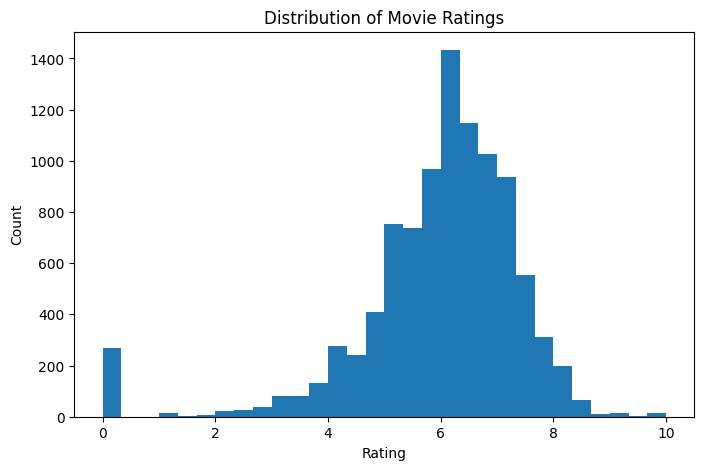

In [54]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
df["vote_average"].plot(kind="hist", bins=30)
plt.title("Distribution of Movie Ratings")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()


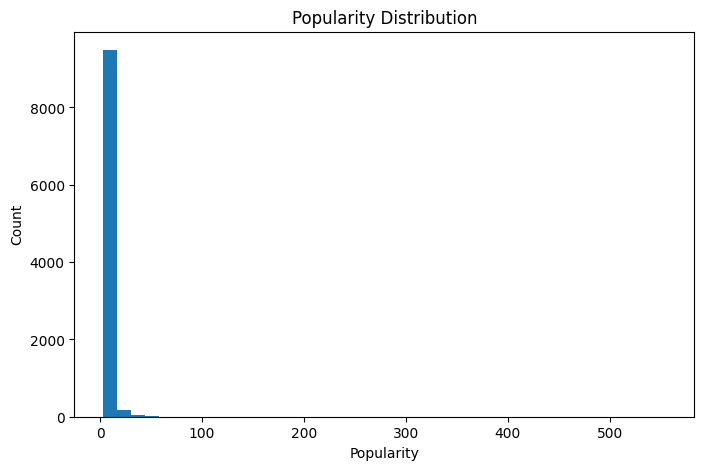

In [55]:
plt.figure(figsize=(8,5))
df["popularity"].plot(kind="hist", bins=40)
plt.title("Popularity Distribution")
plt.xlabel("Popularity")
plt.ylabel("Count")
plt.show()


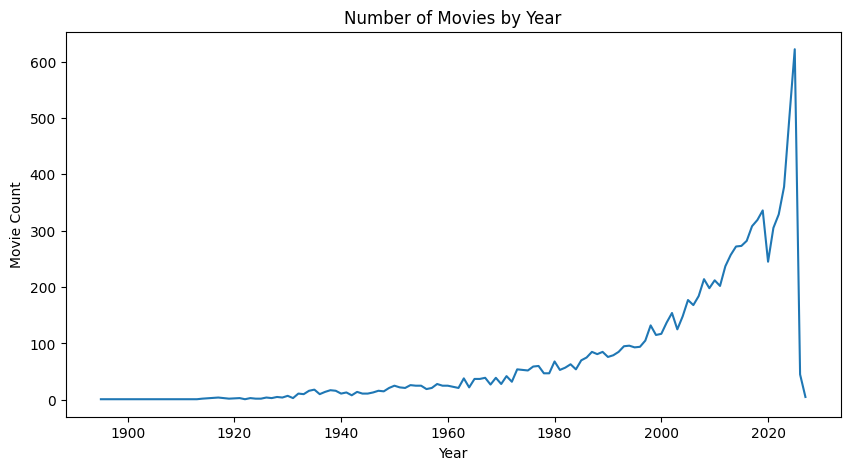

In [56]:
df["year"] = df["release_date"].dt.year

df["year"].value_counts().sort_index().plot(kind="line", figsize=(10,5))
plt.title("Number of Movies by Year")
plt.xlabel("Year")
plt.ylabel("Movie Count")
plt.show()
